## Problem Statement

## Description: Classify patients as having chronic kidney disease or not using Machine Learning

* The Chronic Kidney Disease Dataset consists of 24 features and 1 target variable( 11 numeric, 14 nominal/categorical)

* The numerical features include: 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'

* The categorical features include: 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification'

* It is a binary classification problem.

## Relevant Information about the Dataset:
			age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo	-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet	-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class	-	classification (CKD-Chronic Kidney Disease / notckd- Not Chronic Kidney Disease	

* 4.Number of Instances:  400 (250 CKD, 150 notckd)

* 5.Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 

* 6.Attribute Information :

 	1.Age(numerical): age in years
    
 	2.Blood Pressure(numerical): bp in mm/Hg
	       	
 	3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
	  	
 	4.Albumin(nominal): al - (0,1,2,3,4,5)
		
 	5.Sugar(nominal): su - (0,1,2,3,4,5)
		
 	6.Red Blood Cells(nominal): rbc - (normal,abnormal)
		
 	7.Pus Cell (nominal): pc - (normal,abnormal)
		
 	8.Pus Cell clumps(nominal): pcc - (present,notpresent)
		
 	9.Bacteria(nominal): ba  - (present,notpresent)
		
 	10.Blood Glucose Random(numerical): bgr in mgs/dl		
		
 	11.Blood Urea(numerical): bu in mgs/dl
		
 	12.Serum Creatinine(numerical): sc in mgs/dl	
		
 	13.Sodium(numerical): sod in mEq/L
		
 	14.Potassium(numerical): pot in mEq/L
		
 	15.Hemoglobin(numerical): hemo in gms
		
 	16.Packed  Cell Volume(numerical)
    
 	17.White Blood Cell Count(numerical): wc in cells/cumm
		
 	18.Red Blood Cell Count(numerical): rc in millions/cmm	
		
 	19.Hypertension(nominal): htn - (yes,no)	
		
 	20.Diabetes Mellitus(nominal): dm - (yes,no)
		
 	21.Coronary Artery Disease(nominal): cad - (yes,no)
		
 	22.Appetite(nominal): appet - (good,poor)	
		
 	23.Pedal Edema(nominal): pe - (yes,no)
			
 	24.Anemia(nominal): ane - (yes,no)
		
 	25.Class (nominal): classification - (ckd,notckd)	
		

* 7. Missing Attribute Values: Yes(Denoted by "?")

* 8. Class Distribution: ( 2 classes)
    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, log_loss, roc_curve  
from sklearn.preprocessing import OrdinalEncoder

pd.options.display.max_rows=None
pd.options.display.max_columns=None


In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

In [2]:
df=pd.read_csv('chronic_kidney_disease.csv', na_values=['?','\t?'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbccc   294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [4]:
#Change the data types of sg, al, su, pcv, wbccc, rbcc as per data definition
df['sg']=df['sg'].astype('object')
df['al']=df['al'].astype('object')
df['su']=df['su'].astype('object')
df['pcv']=df['pcv'].astype('float')
df['wbccc']=df['wbccc'].astype('float')
df['rbcc']=df['rbcc'].astype('float')

In [5]:
df.head().T

,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,NaN,423.0,117.0,106.0


In [6]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
rbc,152,38.00
rbcc,131,32.75
wbccc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


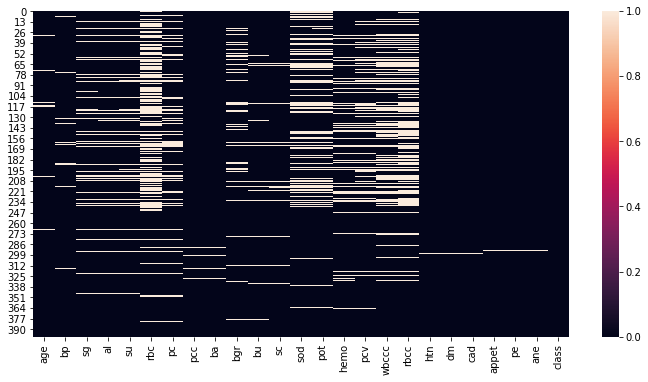

In [7]:
#Visualizing the null values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

In [8]:
df_num=df.select_dtypes(include='number')
df_num.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


<Figure size 1440x1080 with 0 Axes>

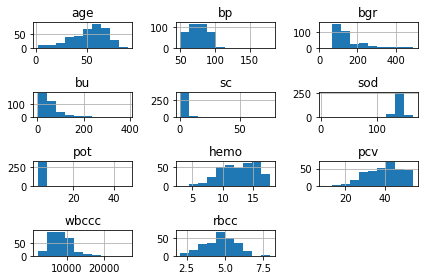

Skewness:


age      -0.668259
bp        1.605429
bgr       2.010773
bu        2.634374
sc        7.509538
sod      -6.996569
pot      11.582956
hemo     -0.335095
pcv      -0.433679
wbccc     1.621589
rbcc     -0.183329
dtype: float64

In [9]:
#Distribution of Numeric Variables by histogram
plt.figure(figsize=(20,15))
df_num.hist()
plt.tight_layout()
plt.show()
print('Skewness:')
df_num.skew()

In [10]:
from sklearn.impute import KNNImputer
imp=KNNImputer()
df1=imp.fit_transform(df_num)
df1=pd.DataFrame(df1, columns=df_num.columns, index=df_num.index )
df1.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96


In [11]:
df1.isnull().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbccc    0
rbcc     0
dtype: int64

In [12]:
def impute_nan_random(df,variable):
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    df[variable+'_random']=df[variable]
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [13]:
for column in df_num.columns:
    impute_nan_random(df_num,column)

In [14]:
df_num.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,age_random,bp_random,bgr_random,bu_random,sc_random,sod_random,pot_random,hemo_random,pcv_random,wbccc_random,rbcc_random
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,48.0,80.0,121.0,36.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,7.0,50.0,410.0,18.0,0.8,136.0,4.9,11.3,38.0,6000.0,4.5


In [15]:
df_rand=pd.DataFrame({
    'age': df_num['age_random'],
    'bp': df_num['bp_random'],
    'bgr': df_num['bgr_random'],
    'bu': df_num['bgr_random'],
    'sc': df_num['sc_random'],
    'sod': df_num['sod_random'],
    'pot': df_num['pot_random'],
    'hemo': df_num['hemo_random'],
    'pcv': df_num['pcv_random'],
    'wbccc': df_num['wbccc_random'],
    'rbcc': df_num['rbcc_random']  
})
df_rand.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,121.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2
1,7.0,50.0,410.0,410.0,0.8,136.0,4.9,11.3,38.0,6000.0,4.5


In [16]:
df_num=df_num.drop(['age_random', 'bp_random', 'bgr_random', 'bgr_random', 'sc_random','sod_random', 'pot_random', 'hemo_random', 'pcv_random', 'wbccc_random', 'rbcc_random'], axis=1)

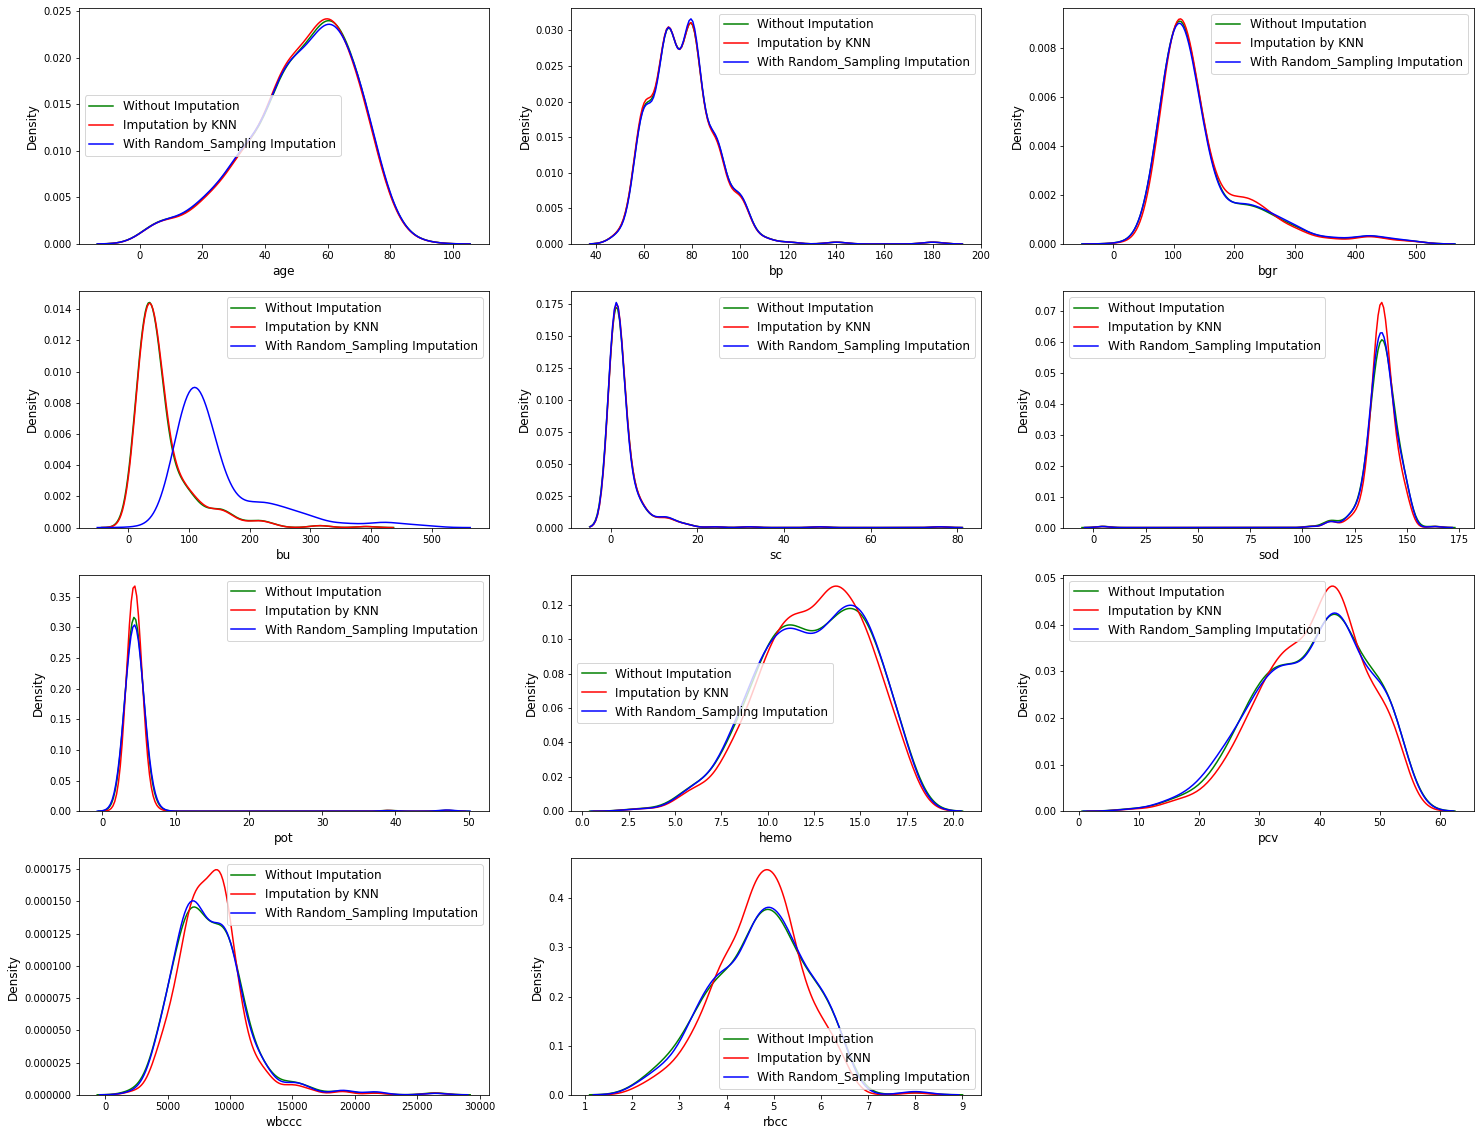

In [17]:
plt.figure(figsize=(25,20))
a=df1.columns
j=1
for i in range(0,df1.shape[1]):
    plt.subplot(4,3,j)
    sns.kdeplot(df_num.iloc[:,i],color='g',label='Without Imputation')
    sns.kdeplot(df1.iloc[:,i],color='r',label='Imputation by KNN')
    sns.kdeplot(df_rand.iloc[:,i],color='b',label='With Random_Sampling Imputation')
    
    plt.xlabel(a[i],size = 12)
    plt.ylabel('Density', size = 12)
    plt.legend(loc="best",prop={'size': 12})
    j=j+1

## Encoding

In [18]:
df_cat=df.select_dtypes(include='object')
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [19]:
dfv1=pd.concat([df1, df_cat],1)
dfv1.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [20]:
dfv1_cat=dfv1.select_dtypes(include='object')
dfv1_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [21]:
# from sklearn.preprocessing import OrdinalEncoder
# ord_enc=OrdinalEncoder()
# #x=[['normal',0], ['abnormal',1], ['notpresent',0], ['present',1], ['no',0], ['yes',1], ['\tno',0], [' yes',1], ['\tyes',1], ['good',0], ['poor',1], ['notckd',0], ['ckd',1],['ckd\t',1]]
# dfv1_cat['rbc']=ord_enc.fit_transform(dfv1_cat['rbc'].values.reshape(-1,1))
# dfv1_cat['rbc'].head(2)

In [22]:
print(df['rbc'].unique(), df['rbc'].value_counts(), sep='\n')

[nan 'normal' 'abnormal']
normal      201
abnormal     47
Name: rbc, dtype: int64


In [23]:
dfv1['rbc']=dfv1['rbc'].replace({'normal':0, 'abnormal':1})

In [24]:
print(df['pc'].unique(), df['pc'].value_counts(), sep='\n')

['normal' 'abnormal' nan]
normal      259
abnormal     76
Name: pc, dtype: int64


In [25]:
dfv1['pc']=dfv1['pc'].replace({'normal':0, 'abnormal':1})

In [26]:
print(df['pcc'].unique(), df['pcc'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    354
present        42
Name: pcc, dtype: int64


In [27]:
dfv1['pcc']=dfv1['pcc'].replace({'notpresent':0, 'present':1})

In [28]:
print(df['ba'].unique(), df['ba'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    374
present        22
Name: ba, dtype: int64


In [29]:
dfv1['ba']=dfv1['ba'].replace({'notpresent':0, 'present':1})

In [30]:
print(df['htn'].unique(), df['htn'].value_counts(), sep='\n')

['yes' 'no' nan]
no     251
yes    147
Name: htn, dtype: int64


In [31]:
dfv1['htn']=dfv1['htn'].replace({'no':0, 'yes':1})

In [32]:
print(df['dm'].unique(), df['dm'].value_counts(), sep='\n')

['yes' 'no' ' yes' '\tno' '\tyes' nan]
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64


In [33]:
dfv1['dm']=dfv1['dm'].replace({'no':0, 'yes':1,'\tno':0,  ' yes':1, '\tyes':1 })

In [34]:
print(df['cad'].unique(), df['cad'].value_counts(), sep='\n')

['no' 'yes' '\tno' nan]
no      362
yes      34
\tno      2
Name: cad, dtype: int64


In [35]:
dfv1['cad']=dfv1['cad'].replace({'no':0, 'yes':1,'\tno':0})

In [36]:
print(df['appet'].unique(), df['appet'].value_counts(), sep='\n')

['good' 'poor' nan]
good    317
poor     82
Name: appet, dtype: int64


In [37]:
dfv1['appet']=dfv1['appet'].replace({'good':0, 'poor':1})

In [38]:
print(df['pe'].unique(), df['pe'].value_counts(), sep='\n')

['no' 'yes' nan]
no     323
yes     76
Name: pe, dtype: int64


In [39]:
dfv1['pe']=dfv1['pe'].replace({'no':0, 'yes':1})

In [40]:
print(df['ane'].unique(), df['ane'].value_counts(), sep='\n')

['no' 'yes' nan]
no     339
yes     60
Name: ane, dtype: int64


In [41]:
dfv1['ane']=dfv1['ane'].replace({'no':0, 'yes':1})

In [42]:
print(df['class'].unique(), df['class'].value_counts(), sep='\n')

['ckd' 'ckd\t' 'notckd']
ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64


In [43]:
dfv1['class']=dfv1['class'].replace({'notckd':0, 'ckd':1,'ckd\t':1})

In [44]:
dfv1['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [45]:
dfv2=dfv1.copy()
dfv2.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [46]:
from sklearn.impute import KNNImputer
imp=KNNImputer()
df3=imp.fit_transform(dfv1)
dfv2=pd.DataFrame(df3, columns=dfv1.columns, index=dfv1.index )
dfv2.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.30,15.4,44.0,7800.0,5.20,1.020,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96,1.020,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80,1.010,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
total=dfv2.isnull().sum().sort_values(ascending=False)
percent=(dfv2.isnull().sum()*100/len(dfv2)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
age,0,0.0
su,0,0.0
ane,0,0.0
pe,0,0.0
appet,0,0.0
cad,0,0.0
dm,0,0.0
htn,0,0.0
ba,0,0.0
pcc,0,0.0


In [48]:
for column in df_cat.columns:
    impute_nan_random(df_cat,column)

In [49]:
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class,sg_random,al_random,su_random,rbc_random,pc_random,pcc_random,ba_random,htn_random,dm_random,cad_random,appet_random,pe_random,ane_random,class_random
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd,1.02,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,1.02,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [50]:
df_rand_cat=pd.DataFrame({
    'sg': df_cat['sg_random'],
    'al': df_cat['al_random'],
    'su': df_cat['su_random'],
    'rbc': df_cat['rbc_random'],
    'pc': df_cat['pc_random'],
    'pcc': df_cat['pcc_random'],
    'ba': df_cat['ba_random'],
    'htn': df_cat['htn_random'],
    'dm': df_cat['dm_random'],
    'cad': df_cat['cad_random'],
    'appet': df_cat['appet_random'],
    'pe': df_cat['pe_random'],
    'ane': df_cat['ane_random'],
    'class': df_cat['class_random']
})
df_rand_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [51]:
df_cat.columns

Index(['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class', 'sg_random', 'al_random', 'su_random',
       'rbc_random', 'pc_random', 'pcc_random', 'ba_random', 'htn_random',
       'dm_random', 'cad_random', 'appet_random', 'pe_random', 'ane_random',
       'class_random'],
      dtype='object')

In [52]:
list1=['sg_random', 'al_random', 'su_random',
       'rbc_random', 'pc_random', 'pcc_random', 'ba_random', 'htn_random',
       'dm_random', 'cad_random', 'appet_random', 'pe_random', 'ane_random',
       'class_random']
df_cat.drop(list1, axis=1, inplace=True)

In [53]:
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [54]:
dfv2.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df_cat.columns

Index(['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class'],
      dtype='object')

In [56]:
list2=['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class']
dfv2_cat=dfv2.loc[:, list2]
dfv2_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
dfv2_cat['pc'].value_counts()

0.0    279
1.0     76
0.2     31
0.4     13
0.6      1
Name: pc, dtype: int64

In [58]:
round(dfv2_cat['pc'],0).value_counts()

0.0    323
1.0     77
Name: pc, dtype: int64

In [59]:
round(dfv2_cat['rbc'],0).value_counts()

0.0    340
1.0     60
Name: rbc, dtype: int64

In [60]:
round(dfv2_cat['pcc'],0).value_counts()

0.0    358
1.0     42
Name: pcc, dtype: int64

In [61]:
dfv2_cat['ba'].value_counts()

0.0    378
1.0     22
Name: ba, dtype: int64

In [62]:
round(dfv2_cat['htn'],0).value_counts()

0.0    253
1.0    147
Name: htn, dtype: int64

In [63]:
round(dfv2_cat['dm'],0).value_counts()

0.0    263
1.0    137
Name: dm, dtype: int64

In [64]:
dfv2_cat['cad'].value_counts()

0.0    366
1.0     34
Name: cad, dtype: int64

In [65]:
dfv2_cat['appet'].value_counts()

0.0    318
1.0     82
Name: appet, dtype: int64

In [66]:
dfv2_cat['pe'].value_counts()

0.0    324
1.0     76
Name: pe, dtype: int64

In [67]:
round(dfv2_cat['ane'],0).value_counts()

0.0    340
1.0     60
Name: ane, dtype: int64

## Outlier Treatment

In [68]:
df1.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96


In [69]:
df1.shape

(400, 11)

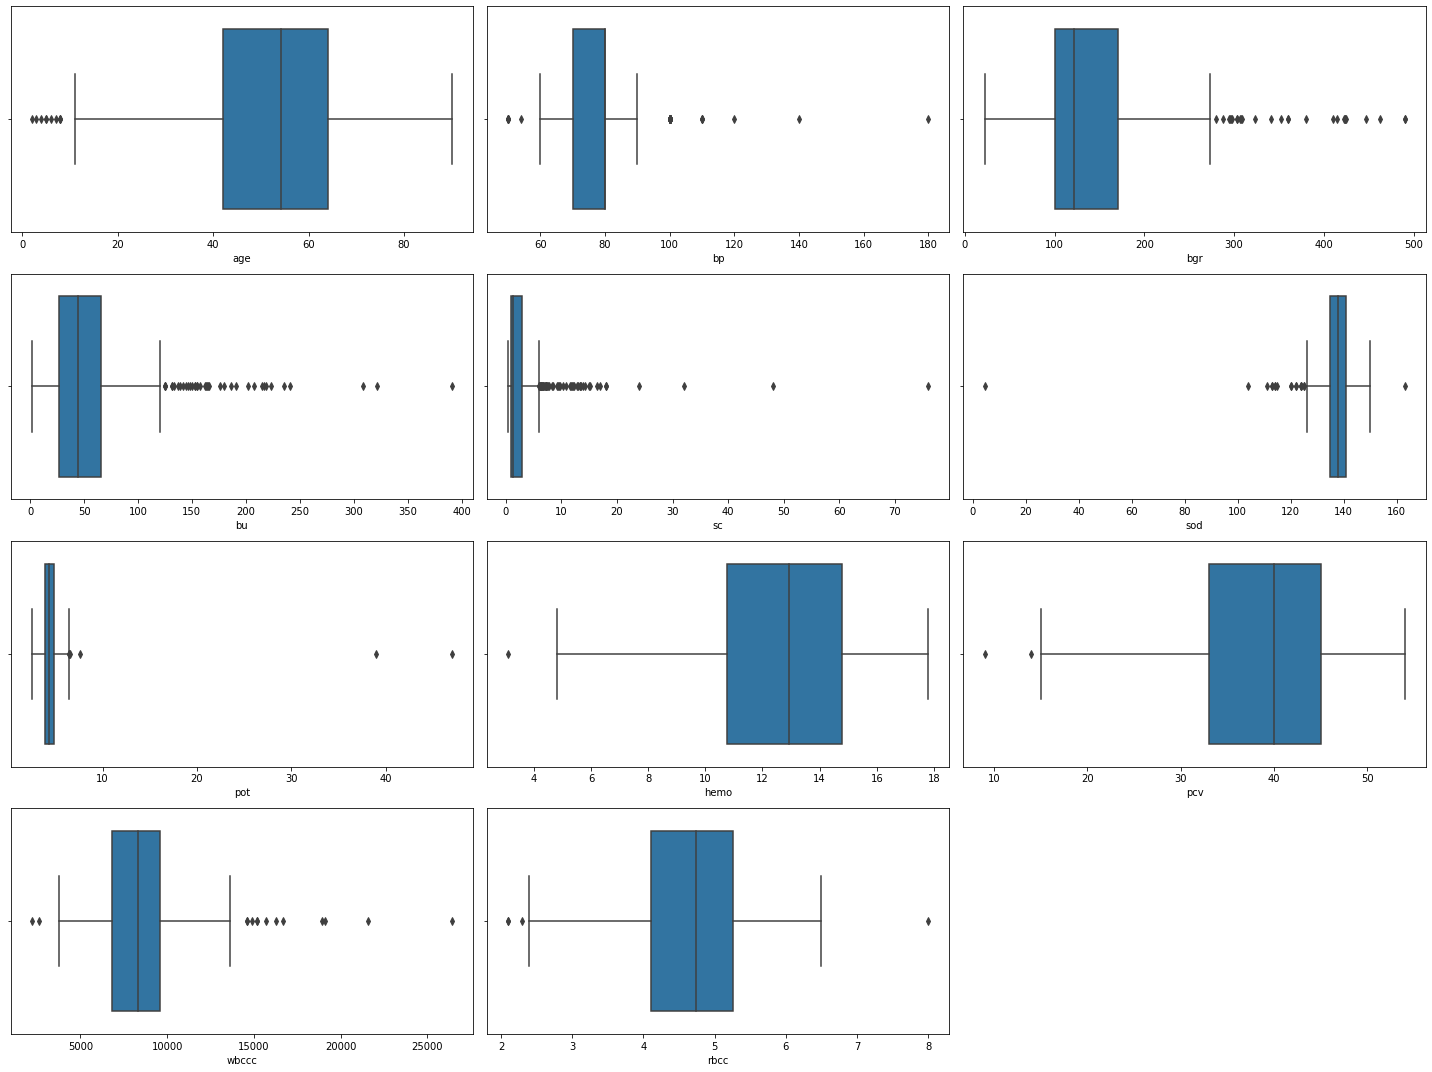

In [70]:
plt.figure(figsize=(20,15))
j=1
for i in df1.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df1[i])
    j=j+1
    plt.tight_layout()

In [71]:
df1_ot=df1.copy()

In [72]:
#Outlier Treatment
#Capping the outliers #Winsorization
for i in df1_ot.columns:
    q1=df1_ot[i].quantile(0.25)
    q3=df1_ot[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=df1_ot[i].quantile(0.99)
    lc=df1_ot[i].quantile(0.01)
    for ind1 in df1_ot[i].index:
        if df1_ot.loc[ind1, i] >ub:            
            df1_ot.loc[ind1, i] =uc
        if df1_ot.loc[ind1, i] < lb:
            df1_ot.loc[ind1, i] =lc

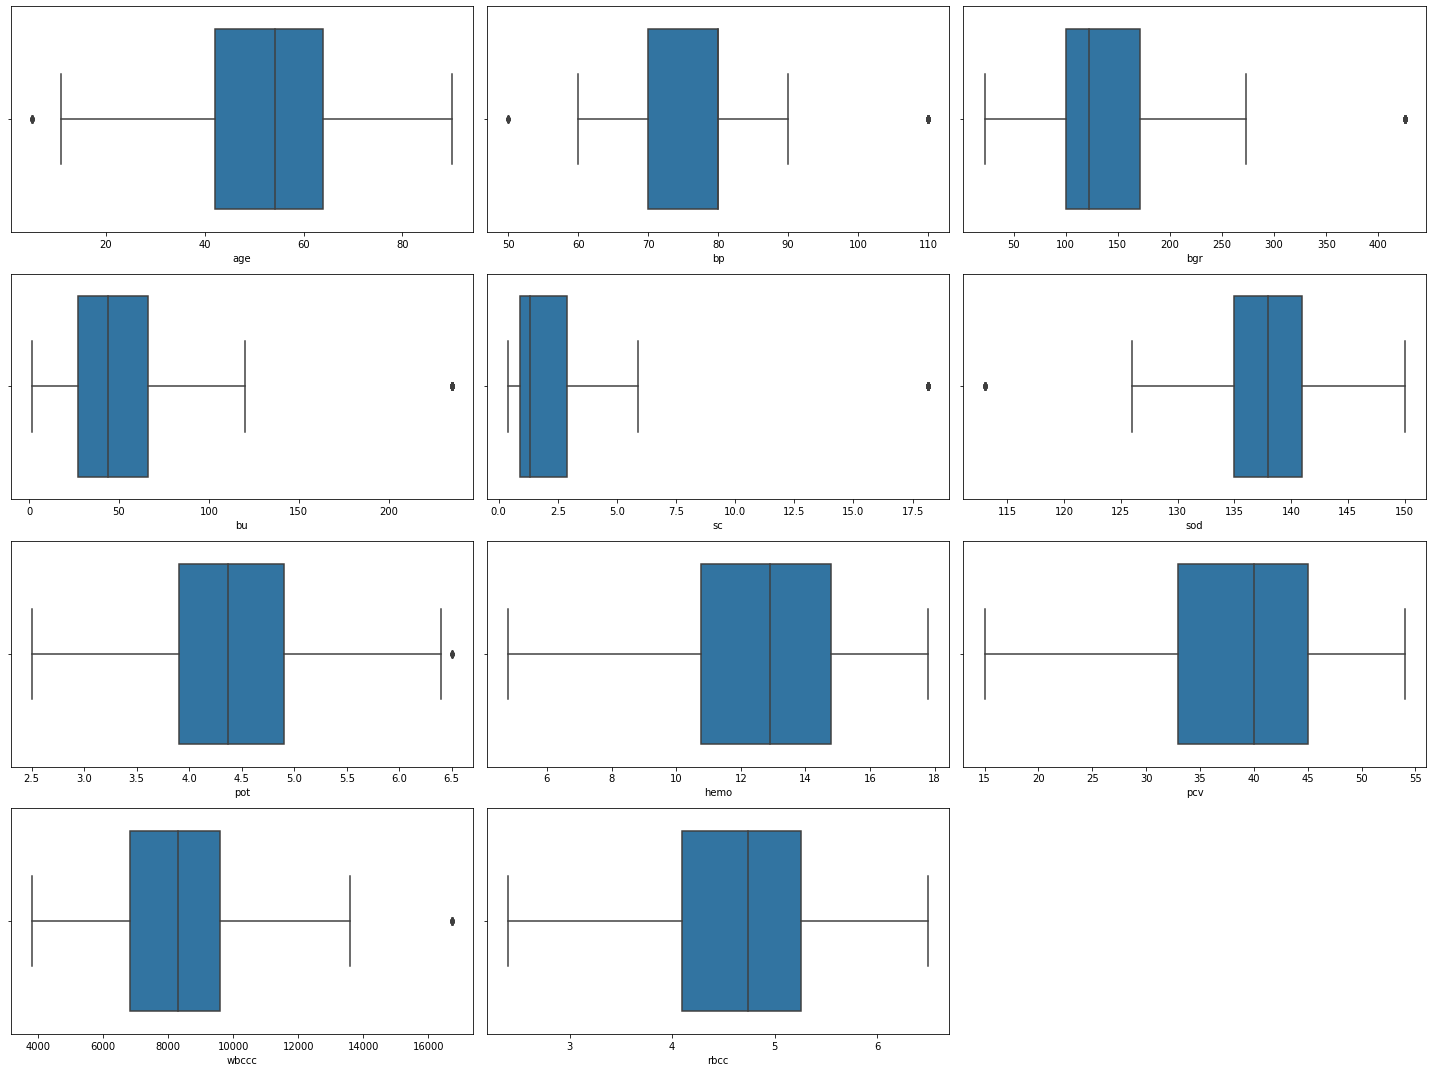

In [73]:
#Box plot after outlier treatment

plt.figure(figsize=(20,15))
j=1
for i in df1_ot.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df1_ot[i])
    j=j+1
    plt.tight_layout()

In [74]:
# from scipy.stats.mstats import winsorize
# df1['age'] = winsorize(df1['age'], limits=(0, 0.05), inplace=True, inclusive=(False, False))

In [75]:
inp=dfv2.drop(['class'], axis=1)
out=dfv2['class']

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc, columns=inp.columns, index=inp.index)
inp_sc.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,-0.203389,0.274543,-0.365435,-0.438173,-0.333460,0.134207,-0.095670,1.029280,0.602511,-0.250497,0.564886,0.467704,0.003882,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,1.310497,1.384923,-0.304789,-0.507801,-0.484322,-0.421567
1,-2.616277,-1.930625,-0.470103,-0.801400,-0.404567,-0.016739,-0.201911,-0.456652,-0.114124,-0.944767,0.298927,0.467704,2.333053,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,-0.766361,-0.724632,-0.304789,-0.507801,-0.484322,-0.421567


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=99, stratify=out)

In [78]:
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred=knn.predict(xtest)
ypred

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [79]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        45
         1.0       1.00      0.89      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120



In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn, inp, out, cv=5, scoring='f1')
score

array([0.65882353, 0.70454545, 0.68085106, 0.65909091, 0.64444444])

In [81]:
np.mean(score)*100

66.95510802644719

In [82]:
np.std(score)/np.mean(score)*100

3.137947601925297

In [83]:
mean_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod, inp_sc, out, cv=5, scoring='f1')
    mean_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score))

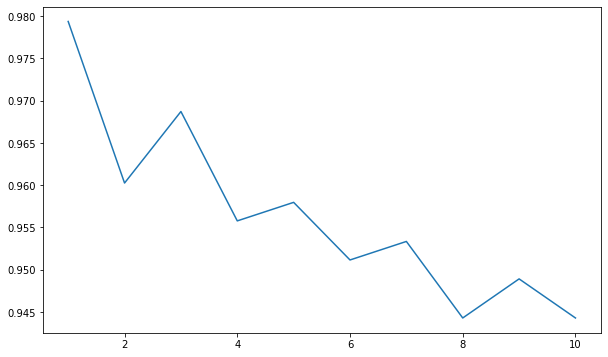

In [84]:
plt.figure(figsize=(10,6))
plt.plot(k,mean_sc)
plt.show()

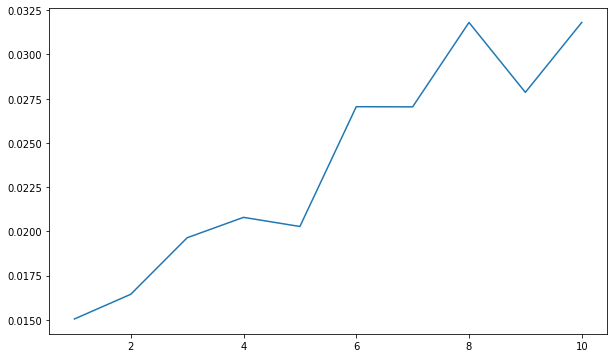

In [85]:
plt.figure(figsize=(10,6))
plt.plot(k,var_sc)
plt.show()

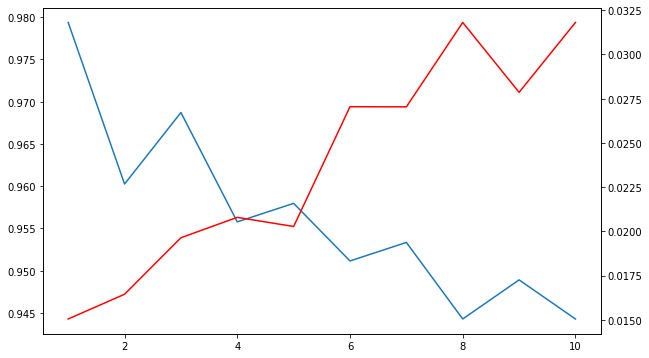

In [86]:
plt.figure(figsize=(10,6))
plt.plot(k,mean_sc)
plt.twinx()
plt.plot(k,var_sc,color='red')
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV
mod=KNeighborsClassifier()

params={'n_neighbors': [3,5,7,9,11,13,15],
       'p':[1,2,3,4,5],
       'weights':['uniform', 'distance']}

In [88]:
hyp_mod=GridSearchCV(mod, param_grid=params, scoring='f1')

In [89]:
tun_mod=hyp_mod.fit(xtrain, ytrain)

In [90]:
tun_mod.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

In [91]:
tun_mod.best_score_

0.9763815195124124

In [92]:
res=pd.DataFrame(tun_mod.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006369,0.007803,0.008427,7.149030e-03,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",1.000000,0.939394,0.923077,0.985507,0.923077,0.954211,0.032355,27
1,0.006324,0.005865,0.007939,7.089171e-03,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.000000,0.939394,0.923077,0.985507,0.923077,0.954211,0.032355,27
2,0.003125,0.006249,0.006250,7.655064e-03,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.939394,0.967244,0.017880,11
3,0.006251,0.007656,0.000000,0.000000e+00,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.939394,0.967244,0.017880,11
4,0.007551,0.007007,0.015626,2.855454e-06,3,3,uniform,"{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
5,0.000000,0.000000,0.021433,5.663353e-03,3,3,distance,"{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
6,0.002508,0.003133,0.020076,1.003354e-05,3,4,uniform,"{'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
7,0.002488,0.002926,0.018082,1.878545e-03,3,4,distance,"{'n_neighbors': 3, 'p': 4, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
8,0.001600,0.003201,0.020438,4.176306e-03,3,5,uniform,"{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
9,0.003223,0.003948,0.017589,3.202902e-03,3,5,distance,"{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1


In [93]:
res.sort_values('std_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.0048,0.003919,0.025596,0.009327,5,3,distance,"{'n_neighbors': 5, 'p': 3, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
14,0.0032,0.003919,0.019197,0.003919,5,3,uniform,"{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
18,0.0016,0.003201,0.018904,0.006175,5,5,uniform,"{'n_neighbors': 5, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
19,0.0032,0.003919,0.019551,0.005116,5,5,distance,"{'n_neighbors': 5, 'p': 5, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
8,0.0016,0.003201,0.020438,0.004176,3,5,uniform,"{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1


In [94]:
final_knn=KNeighborsClassifier(n_neighbors=5, p=5, weights='uniform')

In [95]:
final_knn.fit(xtrain, ytrain)
ypred=final_knn.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        45
         1.0       1.00      0.92      0.96        75

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



### After hyperparameter tuning, we could able to improve the performance by 2%. 

## Logistic Regression (Stats Model)

In [96]:
import statsmodels.api as sm

In [97]:
# inpc=sm.add_constant(inp) #So we need this dummy constant#
# mod=sm.Logit(out,inpc).fit()
# mod.summary()

## Logistic Regression (Linear Regression)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp, out, test_size=0.3, random_state=99)

In [100]:
mod=LogisticRegression()
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
ypred

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0.])

In [101]:
yprob=mod.predict_proba(xtest)
yprob[:10]#first 10 values. (1-p) and p values

array([[4.08986511e-09, 9.99999996e-01],
       [7.13466854e-01, 2.86533146e-01],
       [3.31352582e-04, 9.99668647e-01],
       [3.26845292e-07, 9.99999673e-01],
       [9.86449719e-01, 1.35502808e-02],
       [9.99679584e-01, 3.20416184e-04],
       [4.21048220e-05, 9.99957895e-01],
       [9.31543308e-04, 9.99068457e-01],
       [6.63672593e-01, 3.36327407e-01],
       [5.32864095e-01, 4.67135905e-01]])

In [102]:
mod.coef_

array([[-4.71778810e-02,  6.16330630e-02,  3.80110275e-02,
        -1.08809473e-02,  8.15202431e-01,  4.92445695e-02,
        -2.11235985e-01, -1.04760789e+00, -4.34879414e-02,
         2.99871928e-04, -8.85219626e-02,  9.72399930e-03,
         9.58731123e-01,  1.32890656e-01,  1.28010741e-01,
         7.41947365e-02,  1.89921152e-02,  2.55987525e-02,
         2.01954275e-01,  1.79751193e-01,  2.80577834e-02,
         1.13266386e-01,  2.09248619e-01,  3.79933984e-02]])

In [103]:
mod.intercept_

array([0.01474574])

In [104]:
mod1=LogisticRegression(C=1000000000000)
mod1.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)
ypred

array([1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0.])

In [105]:
mod1.coef_

array([[-2.01325823e-02,  6.17495075e-02,  2.42518089e-02,
         3.01855155e-02,  1.89974445e-01,  5.64308406e-02,
        -3.91709416e-02, -2.69076464e-01, -2.88517192e-01,
         5.47290713e-05, -3.53524740e-02,  1.98863884e-03,
         1.95631614e-01,  2.32995976e-02,  2.56821826e-02,
         1.94901824e-02,  6.22925617e-03,  5.19364410e-03,
         4.57793943e-02,  3.93183904e-02,  7.35626003e-03,
         2.49250388e-02,  4.32300553e-02,  9.05611104e-03]])

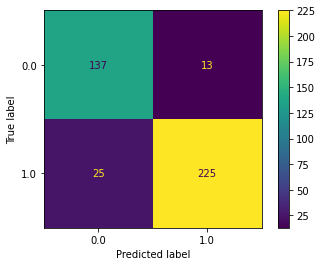

array([[40,  5],
       [ 8, 67]], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(mod1, inp, out)
plt.show()
cm=confusion_matrix(ytest, ypred)
cm

In [107]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mod1, inp, out, cv=5, scoring='f1')
score

array([0.88659794, 0.91666667, 0.91836735, 0.90721649, 0.92929293])

In [108]:
np.mean(score), np.std(score)/np.mean(score)

(0.9116282751776124, 0.015735021651149612)

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

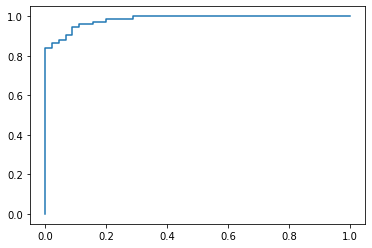

In [110]:
yprob=yprob[:,1] #Consider only 2nd column
fpr, tpr, th=roc_curve(ytest, yprob)
plt.plot(fpr, tpr)
plt.show()

In [111]:
roc_auc_score(ytest, yprob)

0.9834074074074074

In [112]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(ytest, ypred)

0.7719298245614035

In [113]:
ypred_th=np.zeros([len(ytest),1])
ypred_th[yprob>0.3]=1  

In [114]:
print(classification_report(ytest, ypred_th))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        45
         1.0       0.91      0.97      0.94        75

    accuracy                           0.93       120
   macro avg       0.93      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



### Check with different threshold values

In [115]:
th1=[0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9]  #Defining different prob values

In [116]:
acc=[]
rec=[]
pre=[]
f1=[]
for i in th1:
    ypred_th=np.zeros([len(ytest),1])
    ypred_th[yprob>i]=1
    acc.append(accuracy_score(ytest, ypred_th))
    rec.append(recall_score(ytest, ypred_th))
    pre.append(precision_score(ytest, ypred_th))
    f1.append(f1_score(ytest, ypred_th))

In [117]:
res=pd.DataFrame()
res['Threshold']=th1
res['Accuracy']=acc
res['Recall']=rec
res['Precision']=pre
res['F1_score']=f1
res

,Threshold,Accuracy,Recall,Precision,F1_score
0,0.1,0.850000,1.000000,0.806452,0.892857
1,0.2,0.900000,0.986667,0.870588,0.925000
2,0.3,0.925000,0.973333,0.912500,0.941935
3,0.4,0.925000,0.946667,0.934211,0.940397
4,0.6,0.916667,0.906667,0.957746,0.931507
5,0.7,0.908333,0.880000,0.970588,0.923077
6,0.8,0.900000,0.853333,0.984615,0.914286
7,0.9,0.891667,0.840000,0.984375,0.906475


#### Youden Index method of choosing the threshold for which threshold the (TPR-FPR) is maximum. This model is considered as the best model.

In [118]:
fpr, tpr, th=roc_curve(ytest, yprob)

res1=pd.DataFrame({
    'Threshold':th, 'TPR':tpr, 'FPR':fpr
})

res1['TPR-FPR']=res1['TPR']-res1['FPR']
res1.sort_values('TPR-FPR', ascending=False)

,Threshold,TPR,FPR,TPR-FPR
10,0.440299,0.946667,0.088889,0.857778
12,0.391375,0.960000,0.111111,0.848889
4,0.779289,0.866667,0.022222,0.844444
2,0.929819,0.840000,0.000000,0.840000
8,0.649439,0.906667,0.066667,0.840000
11,0.406979,0.946667,0.111111,0.835556
6,0.726722,0.880000,0.044444,0.835556
5,0.726870,0.866667,0.044444,0.822222
14,0.308778,0.973333,0.155556,0.817778
9,0.584755,0.906667,0.088889,0.817778


In [119]:
def rocauc_curve(df,prediction):
    tpr,fpr,th=roc_curve(df,prediction)
    auc_score=roc_auc_score(df,prediction)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

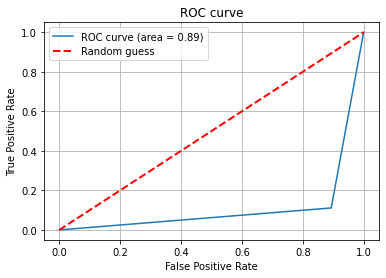

In [120]:
rocauc_curve(ytest,ypred)

## After Outlier Treatment and Rounding

In [121]:
dfv3=pd.concat([df1_ot, dfv2_cat],axis=1)
dfv3.head(3)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.00,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,5.0,50.0,113.00,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,425.22,53.0,1.8,133.8,4.2,9.6,31.0,7500.0,3.80,1.01,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [122]:
inp3=dfv3.drop(['class'], axis=1)
out3=dfv3['class']

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp3_sc=sc.fit_transform(inp3)
inp3=pd.DataFrame(inp3_sc, columns=inp3.columns, index=inp3.index)
inp3.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,-0.202059,0.247564,-0.368839,-0.443716,-0.458377,0.171949,-0.122326,1.034298,0.605257,-0.261749,0.577383,0.467704,0.003882,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,1.310497,1.384923,-0.304789,-0.507801,-0.484322,-0.421567
1,-2.727066,-1.940039,-0.460730,-0.741459,-0.529152,-0.026836,-0.555775,-0.462433,-0.118583,-1.001854,0.306209,0.467704,2.333053,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,-0.766361,-0.724632,-0.304789,-0.507801,-0.484322,-0.421567


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp3, out3, test_size=0.3, random_state=99, stratify=out)

In [125]:
knn3=KNeighborsClassifier()
knn3.fit(xtrain, ytrain)
ypred3=knn3.predict(xtest)
ypred3

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [126]:
print(classification_report(ytest, ypred3))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        45
         1.0       1.00      0.91      0.95        75

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [127]:
score=cross_val_score(knn, inp, out, cv=5, scoring='f1')
score

array([0.65882353, 0.70454545, 0.68085106, 0.65909091, 0.64444444])

In [128]:
np.mean(score)

0.669551080264472

In [129]:
np.std(score)/np.mean(score)

0.03137947601925297

In [130]:
mean_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod, inp3, out3, cv=5, scoring='f1')
    mean_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score))

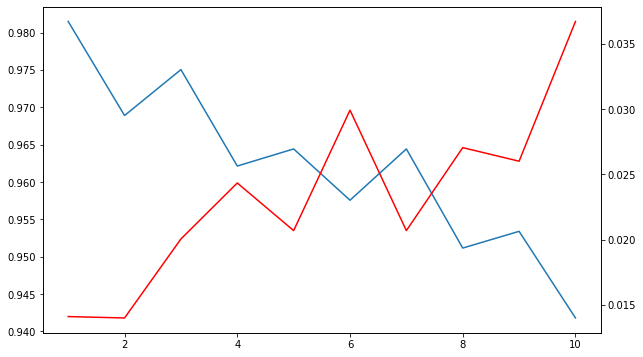

In [131]:
plt.figure(figsize=(10,6))
plt.plot(k,mean_sc)
plt.twinx()
plt.plot(k,var_sc,color='red')
plt.show()

## Naive Baye's Algorithm

In [132]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [133]:
modGB=GaussianNB()
modGB.fit(xtrain, ytrain)
ypred=modGB.predict(xtest)
ypred

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [134]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.92        45
         1.0       0.97      0.93      0.95        75

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [135]:
ypred_train=modGB.predict(xtrain)
ypred_test=modGB.predict(xtest)

In [136]:
from sklearn.metrics import f1_score
print("Performance of train model", f1_score(ytrain, ypred_train))
print("Performance of test model", f1_score(ytest, ypred_test))

Performance of train model 0.9585798816568047
Performance of test model 0.9523809523809524


#### Since the difference between train and test performance is very less, model is not overfitting. 

In [137]:
score=cross_val_score(modGB, inp, out, cv=5, scoring='f1')
np.mean(score), np.std(score)/np.mean(score) 

(0.9669139797864756, 0.014666984140539132)

In [138]:
modBB=BernoulliNB()
modBB.fit(xtrain, ytrain)
ypred=modBB.predict(xtest)
ypred

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [139]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        45
         1.0       1.00      0.88      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.92       120
weighted avg       0.94      0.93      0.93       120



In [140]:
ypred_train=modBB.predict(xtrain)
ypred_test=modBB.predict(xtest)
print("Performance of train model", f1_score(ytrain, ypred_train))
print("Performance of test model", f1_score(ytest, ypred_test))

Performance of train model 0.9736070381231672
Performance of test model 0.9361702127659575


#### More the differnce between train and test performace is the indicator of over fitting

In [141]:
score=cross_val_score(modBB, inp, out, cv=5, scoring='f1')
np.mean(score), np.std(score)/np.mean(score) 

(0.9310820508684543, 0.005482371847604588)

# Decision Tree Algorith

In [142]:
out.value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: class, dtype: float64

In [143]:
ytrain.value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: class, dtype: float64

In [144]:
ytest.value_counts(normalize=True)

1.0    0.625
0.0    0.375
Name: class, dtype: float64

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)
ypred

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [146]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        45
         1.0       1.00      0.92      0.96        75

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



In [147]:
score=cross_val_score(dt, inp, out, cv=5, scoring='f1')
np.mean(score), np.std(score)/np.mean(score) 

(0.9738144329896906, 0.008318584631186574)

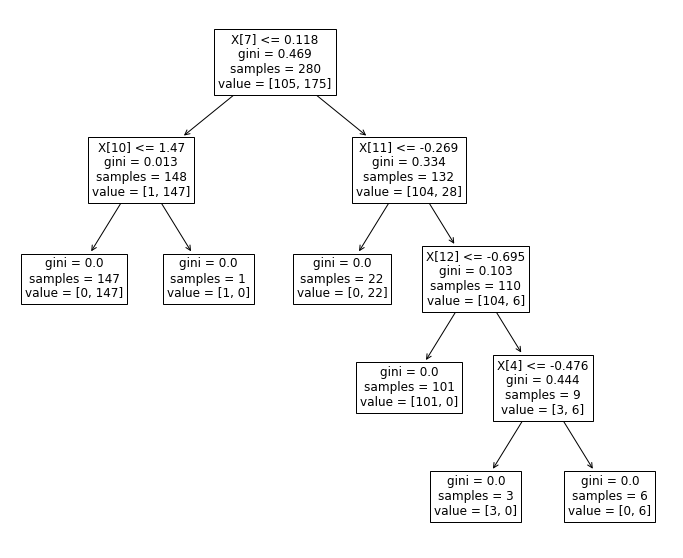

In [148]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dt, fontsize=12)
plt.show()

In [149]:
xtrain.iloc[:, [7,10,11,12,4]].head()

,hemo,rbcc,sg,al,sc
46,-0.060871,0.012437,-0.452973,-0.772508,-0.458377
94,-0.352917,-0.891475,-1.373651,-0.772508,-0.387603
131,-0.279905,-0.868878,-1.373651,-0.772508,-0.564539
78,-0.900501,-0.642899,-0.821244,0.469716,-0.104506
281,1.070804,1.481296,1.388382,-0.772508,-0.458377


In [150]:
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits= 5, shuffle =True, random_state =99)
score =cross_val_score(dt,inp,out,cv = kf, scoring = "f1")
np.mean(score), np.std(score)/np.mean(score)

(0.9742692199374812, 0.01808895359897242)

In [151]:
# Tuning the model for the best max_depth
me_sc=[]
var_sc=[]
md=[1, 2, 3, 4, 5, 8, 10]
for k in md:
    dt_mod=DecisionTreeClassifier(max_depth=k, random_state=99)
    score=cross_val_score(dt_mod, inp, out, cv=5, scoring='f1')
    me_sc.append(np.mean(score))  #Underfitting indicator
    var_sc.append(np.std(score)/np.mean(score)) #Overfitting indicator

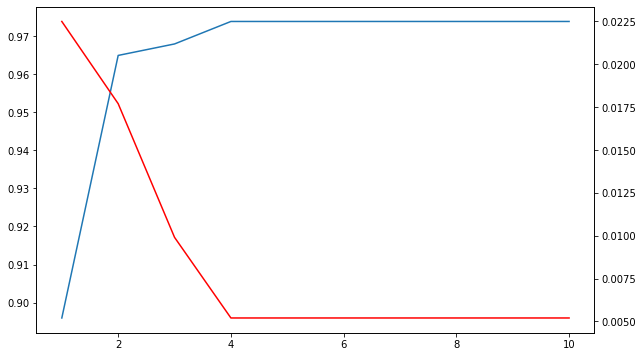

In [152]:
plt.figure(figsize=(10,6))
plt.plot(md,me_sc)
plt.twinx()
plt.plot(md,var_sc,color='red')
plt.show()

In [153]:
from sklearn.model_selection import GridSearchCV
mod=DecisionTreeClassifier(random_state=99)  #Go to help section to see parameters name
kf=KFold(n_splits=5, shuffle=True, random_state=48) #Check for different random states and variation should be less than 5%
params={'max_depth':[1,2,3,4,5,8],
       'min_samples_split':[2,3,4,5,6,7, 8],
       'criterion':['gini', 'entropy']}
hyp_mod=GridSearchCV(mod, param_grid=params, scoring='f1', cv=kf)  #scoring selection depends on Domain application. IN covid model recall is better
tun_mod=hyp_mod.fit(xtrain, ytrain)

In [154]:
tun_mod.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5}

In [155]:
res=pd.DataFrame(tun_mod.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009599,3.199649e-03,0.009599,3.199387e-03,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.873239,0.914286,0.881356,0.848485,0.896552,0.882784,0.022143,78
1,0.007999,3.989506e-07,0.007999,3.234067e-07,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.873239,0.914286,0.881356,0.848485,0.896552,0.882784,0.022143,78
2,0.008870,3.360986e-03,0.010996,3.686572e-03,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.873239,0.914286,0.881356,0.848485,0.896552,0.882784,0.022143,78
3,0.008000,1.689915e-06,0.000000,0.000000e+00,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.873239,0.914286,0.881356,0.848485,0.896552,0.882784,0.022143,78
4,0.006399,3.199267e-03,0.001600,3.199673e-03,gini,1,6,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.873239,0.914286,0.881356,0.848485,0.896552,0.882784,0.022143,78


In [156]:
res.sort_values('std_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.004799,3.918316e-03,0.003200,3.919192e-03,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
13,0.000000,0.000000e+00,0.007999,1.252549e-06,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
12,0.006356,5.876122e-03,0.003607,3.663150e-03,gini,2,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
11,0.004799,3.918705e-03,0.006399,3.199577e-03,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
7,0.006399,3.199506e-03,0.000000,0.000000e+00,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
8,0.007999,7.776979e-07,0.000000,0.000000e+00,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
10,0.000000,0.000000e+00,0.007998,7.294206e-07,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.961039,0.973684,0.952381,0.958904,0.950820,0.959366,0.008122,55
25,0.009376,7.655240e-03,0.000000,0.000000e+00,gini,4,6,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.974359,0.973684,0.968750,0.960000,0.935484,0.962455,0.014428,36
26,0.013804,7.347211e-03,0.000000,0.000000e+00,gini,4,7,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.974359,0.973684,0.968750,0.960000,0.935484,0.962455,0.014428,36
31,0.006399,3.199578e-03,0.001600,3.200245e-03,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.974359,0.973684,0.968750,0.960000,0.935484,0.962455,0.014428,36


In [157]:
final_dt=DecisionTreeClassifier(max_depth=3, min_samples_split=4, criterion='gini')

In [158]:
final_dt.fit(xtrain, ytrain)
ypred=final_dt.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        45
         1.0       0.99      0.93      0.96        75

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120



In [159]:
final_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.66909471, 0.        , 0.        ,
       0.0156109 , 0.2575698 , 0.05772459, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [160]:
imp=pd.DataFrame({'feature':xtrain.columns, 'Importance_score':final_dt.feature_importances_})
imp.sort_values('Importance_score', ascending=False)

,feature,Importance_score
7,hemo,0.669095
11,sg,0.257570
12,al,0.057725
10,rbcc,0.015611
14,rbc,0.000000
22,pe,0.000000
21,appet,0.000000
20,cad,0.000000
19,dm,0.000000
18,htn,0.000000


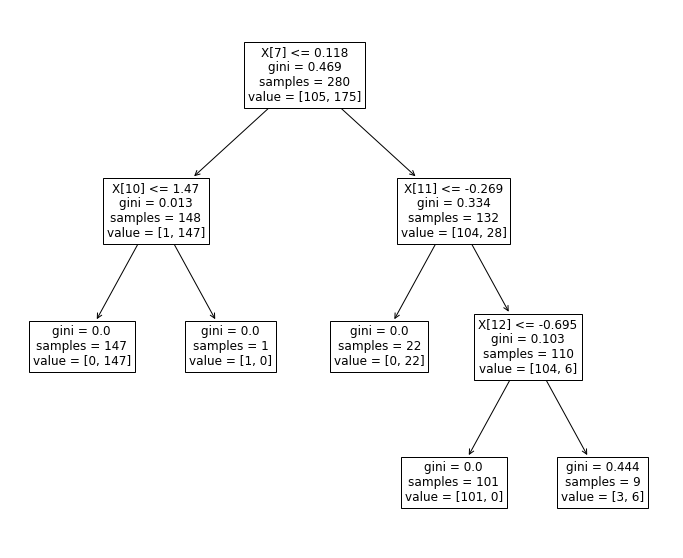

In [161]:
plt.figure(figsize=(12,10))
tree.plot_tree(final_dt, fontsize=12)
plt.show()

# Random Forest Algorith

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=99)
rf.fit(xtrain, ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        45
         1.0       1.00      0.96      0.98        75

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



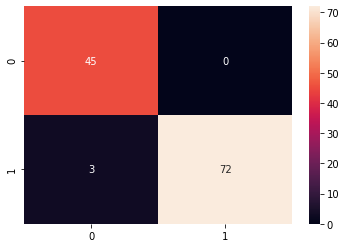

In [163]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.show()

In [164]:
from sklearn.model_selection import cross_val_score,KFold
rf=RandomForestClassifier(random_state=99)
score =cross_val_score(rf,inp,out,cv = 3, scoring = "f1")
score

array([0.98245614, 0.98780488, 0.98795181])

In [165]:
np.mean(score), np.std(score)/np.mean(score)

(0.986070941876191, 0.00259287064642047)